In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url = "C:/test.csv"  
data = pd.read_csv(url)
print(data.head())
print(data.info())
print(data.describe())


   id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4             

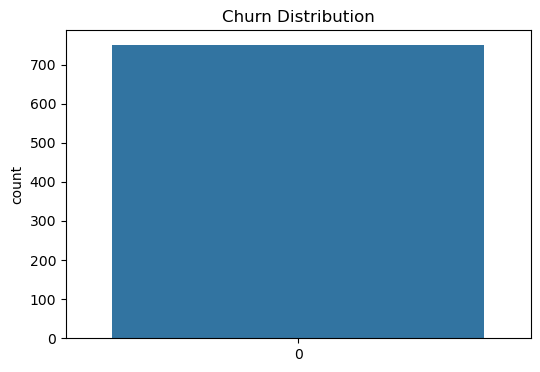

In [4]:
#EDA
# Pairplot for general overview
sns.pairplot(data, hue='total_day_minutes')  
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data['total_day_minutes'])  # Assuming 'international_plan' is the churn indicator
plt.title("Churn Distribution")
plt.show()

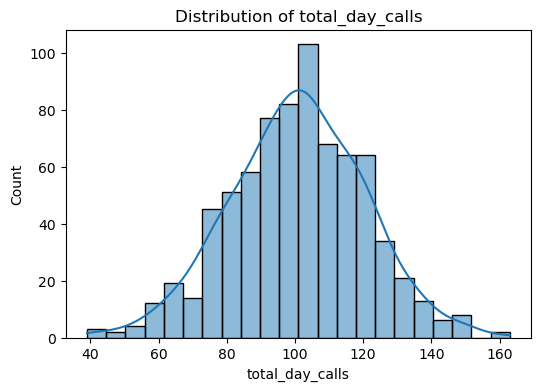

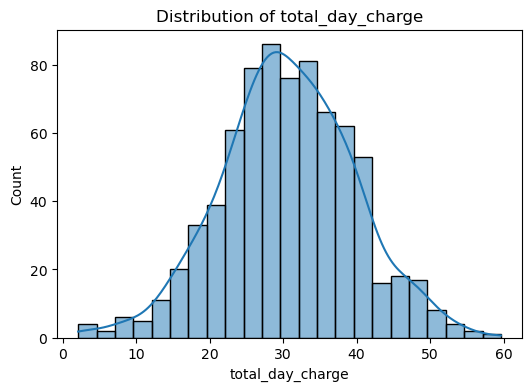

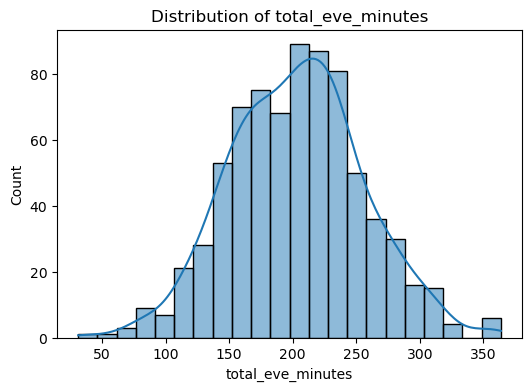

In [5]:
numerical_features = ['total_day_calls', 'total_day_charge', 'total_eve_minutes']  
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


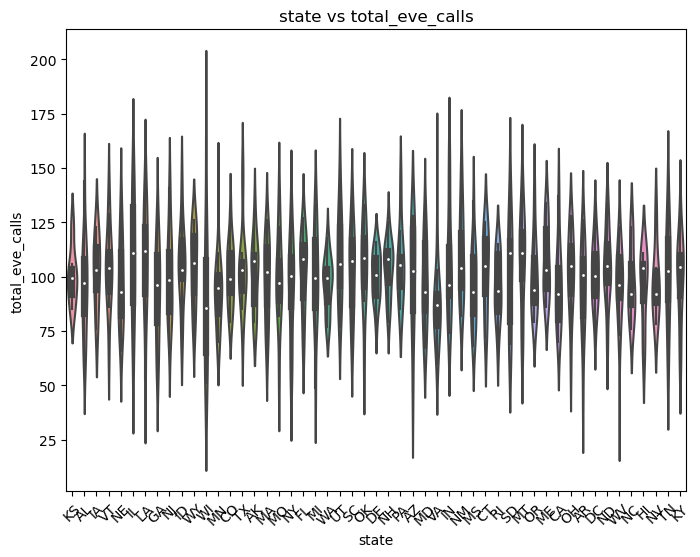

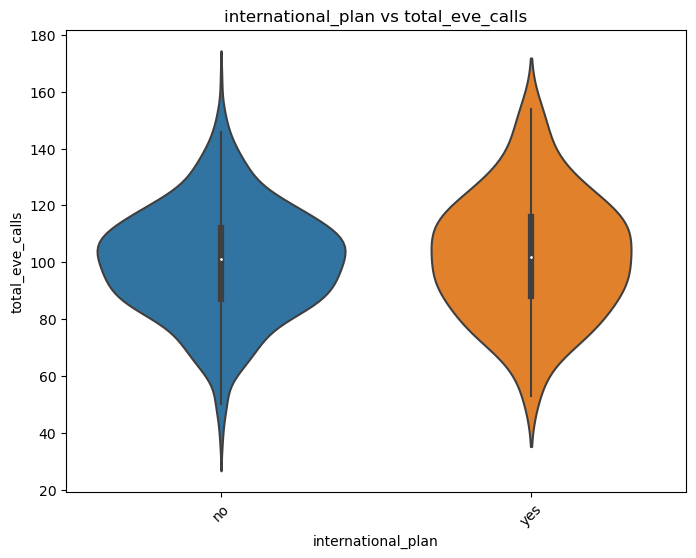

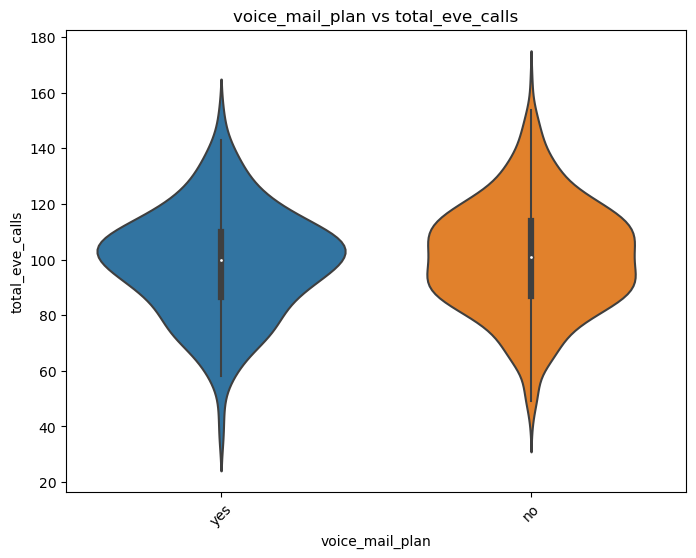

In [5]:
categorical_features = ['state', 'international_plan', 'voice_mail_plan']  # Update with your features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=feature, y='total_eve_calls', data=data)
    plt.title(f"{feature} vs total_eve_calls")
    plt.xticks(rotation=45)
    plt.show()


In [11]:
#preprocessing
import pandas as pd
columns_to_delete = ['state','area_code']

# Use the drop method to delete the specified columns
data.drop(columns=columns_to_delete, inplace=True)


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   account_length                 750 non-null    int64  
 2   number_vmail_messages          750 non-null    int64  
 3   total_day_minutes              750 non-null    float64
 4   total_day_calls                750 non-null    int64  
 5   total_day_charge               750 non-null    float64
 6   total_eve_minutes              750 non-null    float64
 7   total_eve_calls                750 non-null    int64  
 8   total_eve_charge               750 non-null    float64
 9   total_night_minutes            750 non-null    float64
 10  total_night_calls              750 non-null    int64  
 11  total_night_charge             750 non-null    float64
 12  total_intl_minutes             750 non-null    flo

In [13]:
print(data.isnull().sum())


id                               0
account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["total_intl_calls"])
y = data["total_intl_calls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print(X.shape, X_train.shape, X_test.shape)

(750, 15) (600, 15) (150, 15)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=1000)# Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Preprocess the categorical variables using one-hot encoding
#data = pd.get_dummies(data, columns=["Geography", "Gender"])

# Split into features (X) and target (y)
X = data.drop("number_customer_service_calls", axis=1)
y = data["number_customer_service_calls"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
    
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}

# Display evaluation results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1']:.2f}")
    print()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation Results:
Model: Logistic Regression
Accuracy: 0.34
Precision: 0.17
Recall: 0.34
F1 Score: 0.21

Model: Decision Tree
Accuracy: 0.22
Precision: 0.22
Recall: 0.22
F1 Score: 0.22

Model: Random Forest
Accuracy: 0.29
Precision: 0.31
Recall: 0.29
F1 Score: 0.24

Model: Support Vector Machine
Accuracy: 0.35
Precision: 0.12
Recall: 0.35
F1 Score: 0.18



In [18]:
best_model = max(results, key=lambda k: results[k]["F1"])
print("Best Performing Model:", best_model)


Best Performing Model: Random Forest


In [19]:
#deployment
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data
input_data = (15, 28, 57, 123, 6, 58, 26, 17, 19, 38, 17, 17, 12, 12, 15)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Assuming you have a DataFrame named 'data' and want to predict 'number_customer_service_calls'
# Replace 'X' and 'y' with your actual features and target variable
X = data.drop("number_customer_service_calls", axis=1)
y = data["number_customer_service_calls"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model# Create and train a Logistic Regression model with increased max_iter
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)


# Now, you can make predictions with the trained model
prediction = logistic_regression.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Churn: No")
else:
    print("Churn: Yes")


Churn: Yes


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
